In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from datasets import load_dataset

from ultralytics import SAM
from skimage import io
import os
import csv

In [36]:
model = SAM("sam2_l.pt")
model.info()

100%|██████████| 428M/428M [00:17<00:00, 26.3MB/s] 


Model summary: 854 layers, 224,430,130 parameters, 224,430,130 gradients


(854, 224430130, 224430130, 0.0)

In [37]:
def segment(image, custom_points=[320, 320]):    
    image_np = np.array(image)
    
    # Segmentation
    results_pil = model(image, points=custom_points, labels=[2])
    
    # Get the mask from the results
    mask_pil = results_pil[0].masks.data[0].cpu().numpy()
    
    # Masking
    binary_mask = mask_pil > 0.5
    rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
    segmented_image = image_np * rgb_mask
    
    return segmented_image

In [38]:
image = "output/train/original_15.png"
image_name = "11"
CUSTOM_POINTS = [[320, 320]]


0: 1024x1024 1 0, 188.3ms
Speed: 59.2ms preprocess, 188.3ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 1024)


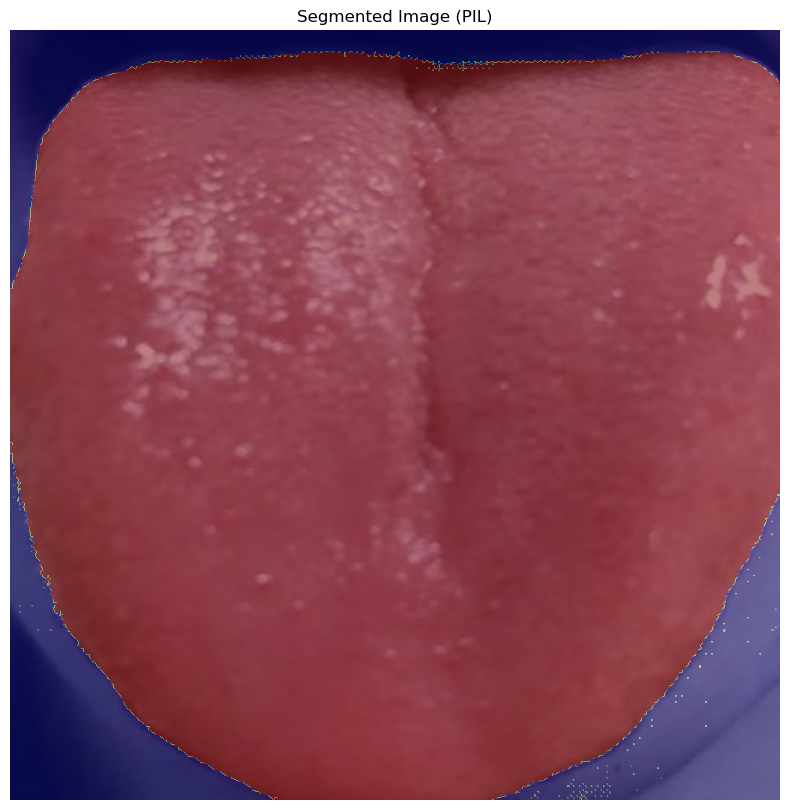

In [41]:
# Using model on PIL.JpegImagePlugin.JpegImageFile object
pil_image = Image.open(image)

# Convert PIL image to numpy array for visualization
test_image_np = np.array(pil_image)

# Segment with point prompt using the PIL image
results_pil = model(pil_image, points=CUSTOM_POINTS, labels=[1])

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(test_image_np)

# Get the mask from the results
mask_pil = results_pil[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask_pil, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image (PIL)')
plt.show()

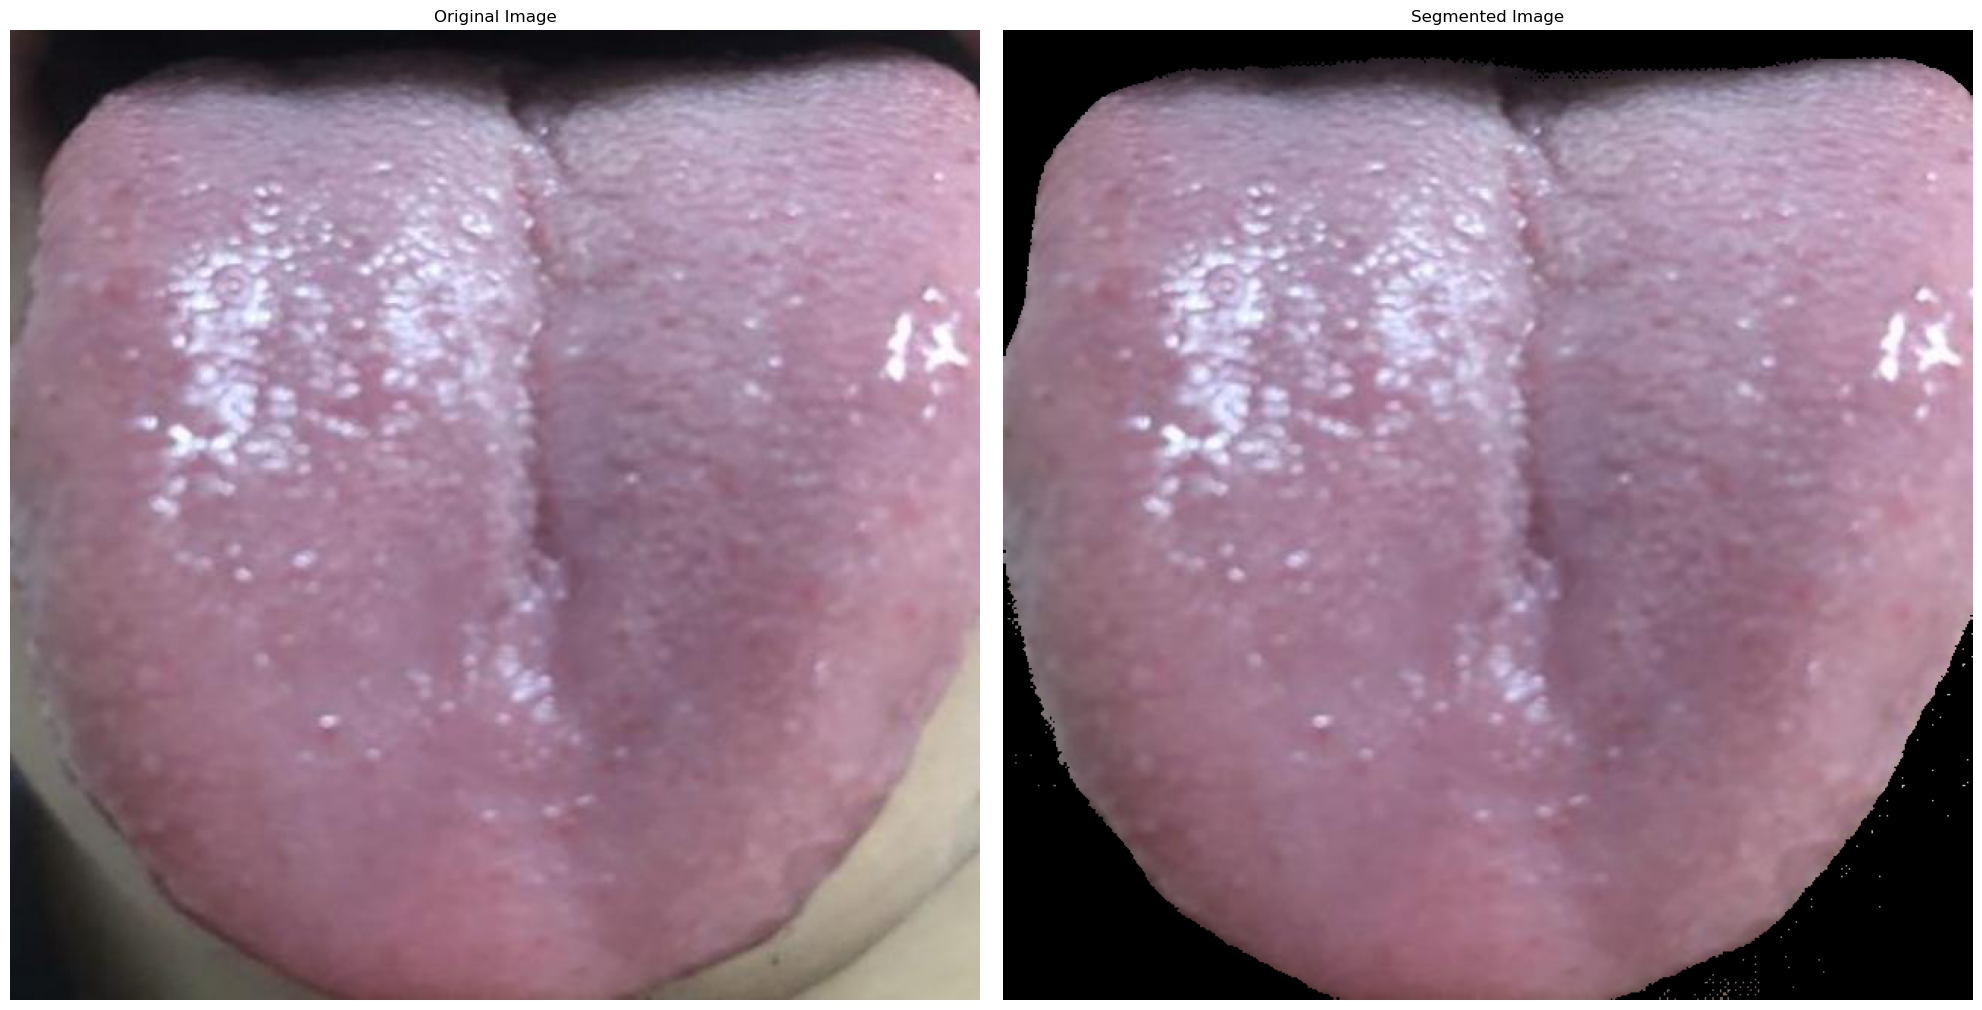

In [42]:
binary_mask = mask_pil > 0.5

rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
segmented_image = test_image_np * rgb_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(test_image_np)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title('Segmented Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [17]:
output_dir = "demo_output"
os.makedirs(output_dir, exist_ok=True)

segmented_image_output = Image.fromarray(segmented_image, mode='RGB')
output_path = os.path.join(output_dir, f"segmented_{image_name}.png")
segmented_image_output.save(output_path)

print(f"Segmented image saved to: {output_path}")

Segmented image saved to: demo_output\segmented_8.png
